In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
google = pd.read_csv("GOOG.csv")
apple = pd.read_csv("AAPL.csv")
amazon = pd.read_csv("AMZN.csv")
microsoft = pd.read_csv("MSFT.csv")
walmart = pd.read_csv("Walmart.csv")

In [3]:
apple.head(10)

,date,close,volume,open,high,low
0,2019/02/08,170.41,23793830.0,168.99,170.660,168.4200
1,2019/02/07,170.94,31644240.0,172.40,173.940,170.3400
2,2019/02/06,174.24,28204640.0,174.65,175.570,172.8531
3,2019/02/05,174.18,36054570.0,172.86,175.080,172.3501
4,2019/02/04,171.25,31384720.0,167.41,171.655,167.2800
5,2019/02/01,166.52,32644590.0,166.96,168.980,165.9300
6,2019/01/31,166.44,40613260.0,166.11,169.000,164.5600
7,2019/01/30,165.25,60800480.0,163.25,166.150,160.2300
8,2019/01/29,154.68,39914850.0,156.25,158.130,154.1100
9,2019/01/28,156.30,26147280.0,155.79,156.330,153.6600


In [4]:
google = pd.read_csv("GOOG.csv", index_col = 'date')
apple = pd.read_csv("AAPL.csv", index_col = 'date')
amazon = pd.read_csv("AMZN.csv", index_col = 'date')
microsoft = pd.read_csv("MSFT.csv", index_col = 'date')
walmart = pd.read_csv("Walmart.csv", index_col = 'date')

In [5]:
walmart.head()

,close,volume,open,high,low
date,,,,,
16:00,95.58,"6,169,080",96.36,96.69,95.14
2019/02/08,95.58,5154483.0000,96.34,96.69,95.14
2019/02/07,96.73,7009881.0000,95.11,96.82,95.00
2019/02/06,95.64,4263653.0000,95.43,96.01,95.22
2019/02/05,95.60,5939171.0000,95.25,95.94,95.02


In [6]:
walmart.drop(walmart.index[0], inplace = True) # Inplace True = to save the modification 

In [7]:
walmart.head()

,close,volume,open,high,low
date,,,,,
2019/02/08,95.58,5154483.0000,96.34,96.69,95.14
2019/02/07,96.73,7009881.0000,95.11,96.82,95.00
2019/02/06,95.64,4263653.0000,95.43,96.01,95.22
2019/02/05,95.60,5939171.0000,95.25,95.94,95.02
2019/02/04,94.77,7252106.0000,93.86,94.77,93.35


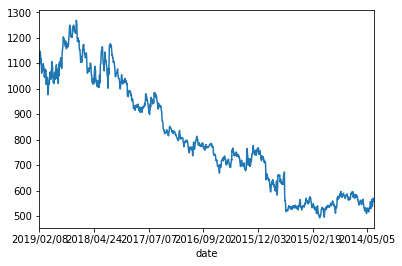

In [8]:
google ['close'].plot()

In [9]:
google = pd.read_csv("GOOG.csv", index_col = 'date')[::-1]
apple = pd.read_csv("AAPL.csv", index_col = 'date')[::-1]
amazon = pd.read_csv("AMZN.csv", index_col = 'date')[::-1]
microsoft = pd.read_csv("MSFT.csv", index_col = 'date')[::-1]
walmart = pd.read_csv("Walmart.csv", index_col = 'date')[::-1]

In [10]:
walmart.drop(walmart.index[-1], inplace = True) # Inplace True = to save the modification 

In [11]:
walmart.head()

,close,volume,open,high,low
date,,,,,
2014/02/10,73.76,6204086.0000,73.59,73.760,72.96
2014/02/11,74.80,6511228.0000,73.90,74.850,73.67
2014/02/12,74.96,5339771.0000,74.22,75.180,74.22
2014/02/13,75.36,5250165.0000,74.68,75.490,74.56
2014/02/14,75.79,4919940.0000,75.40,75.985,75.10


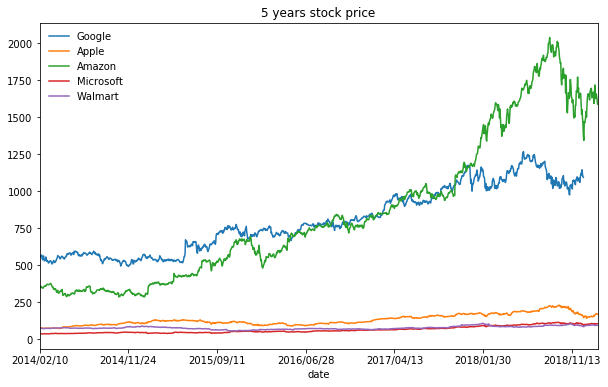

In [12]:
google ['close'].plot (figsize = (10,6), label ="Google", title = "5 years stock price")
apple ['close'].plot(label = "Apple")
amazon['close'].plot(label = "Amazon")
microsoft['close'].plot(label = "Microsoft")
walmart['close'].plot(label ="Walmart")
plt.legend(loc='upper left', frameon=False)

## 5 Year Trade Volume 

In [13]:
# List comprehension 

walmart ['volume'] = [float (each) for each in walmart ['volume']]

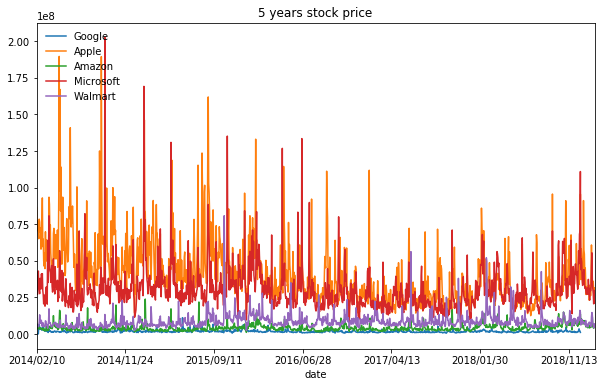

In [14]:
google ['volume'].plot (figsize = (10,6), label ="Google", title = "5 years stock price")
apple ['volume'].plot(label = "Apple")
amazon['volume'].plot(label = "Amazon")
microsoft['volume'].plot(label = "Microsoft")
walmart['volume'].plot(label ="Walmart")
plt.legend(loc='upper left', frameon=False)

In [15]:
microsoft['volume'].argmax()

'2014/09/19'

# Total trade values in 5 Years

In [16]:
google['total trade'] = google['open']*google['volume']
microsoft['total trade'] = microsoft['open']*microsoft['volume']
amazon['total trade'] = amazon['open']*amazon['volume']
walmart['total trade'] = walmart['open']*walmart['volume']
apple['total trade'] = apple['open']*apple['volume']

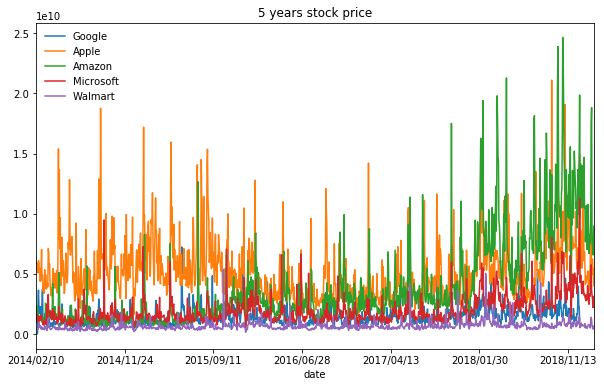

In [17]:
google ['total trade'].plot (figsize = (10,6), label ="Google", title = "5 years stock price")
apple ['total trade'].plot(label = "Apple")
amazon['total trade'].plot(label = "Amazon")
microsoft['total trade'].plot(label = "Microsoft")
walmart['total trade'].plot(label ="Walmart")
plt.legend(loc='upper left', frameon=False)

In [18]:
amazon['total trade'].argmax()

'2018/10/26'

Moving Average Google 

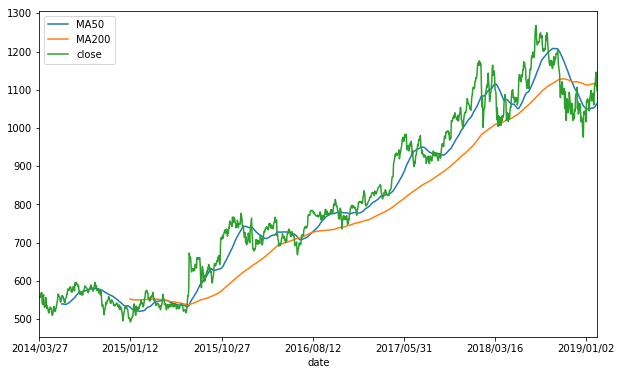

In [19]:
google['MA50'] = google['close'].rolling(50).mean()
google ['MA200'] = google['close'].rolling(200).mean()
google [['MA50','MA200','close']].plot(figsize=(10,6))

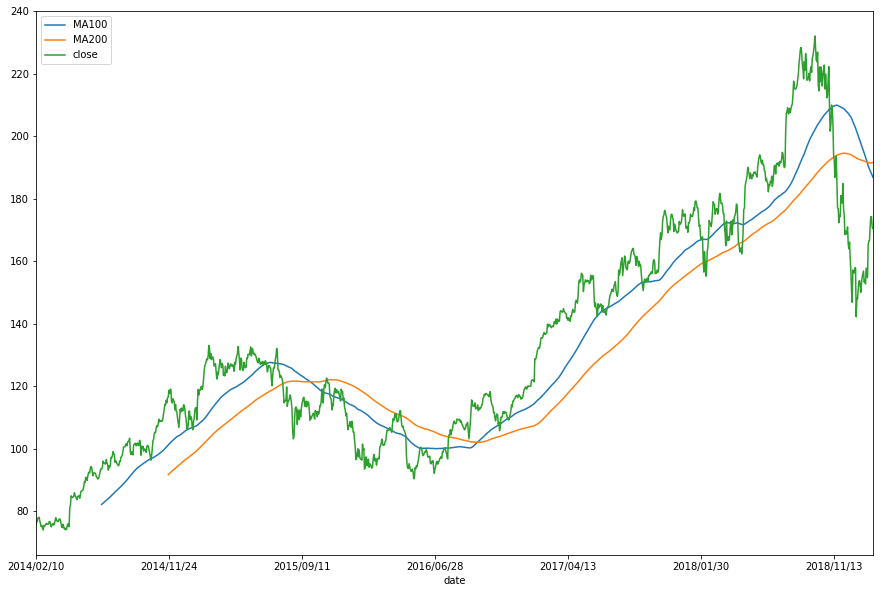

In [20]:
apple['MA100'] = apple ['close'].rolling(100).mean()
apple['MA200'] = apple ['close'].rolling(200).mean()
apple[['MA100', 'MA200', 'close']].plot(figsize=(15,10))

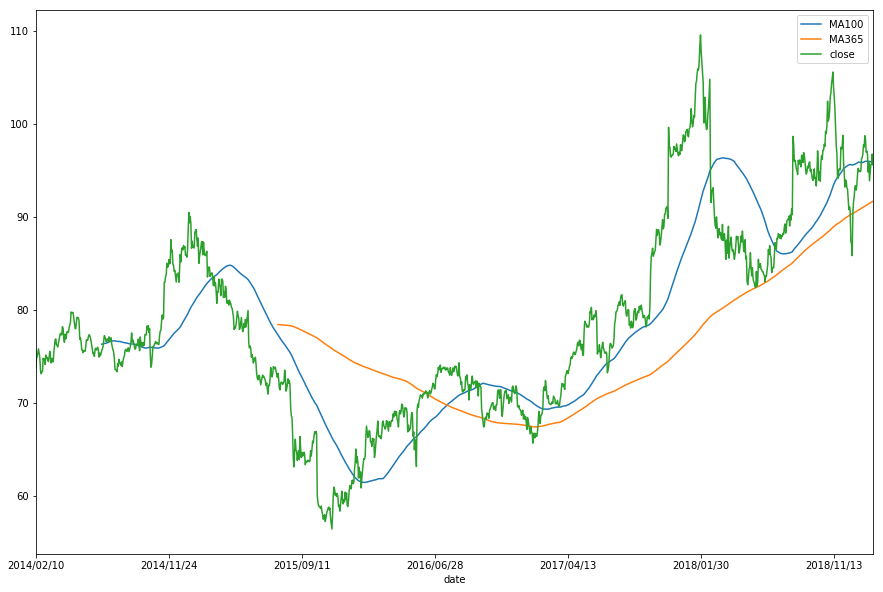

In [21]:
walmart['MA100'] = walmart ['close'].rolling(100).mean()
walmart['MA365'] = walmart ['close'].rolling(365).mean()
walmart[['MA100', 'MA365', 'close']].plot(figsize=(15,10))

# Correlations


In [22]:
from pandas.plotting import scatter_matrix

In [23]:
all_company = pd.concat([google['close'],
                        amazon ['close'],
                        apple['close'],
                        microsoft['close'],
                        walmart ['close']], axis = 1)
all_company.columns = ["Google","Amazon", "Apple","Microsoft", "Walmart"]

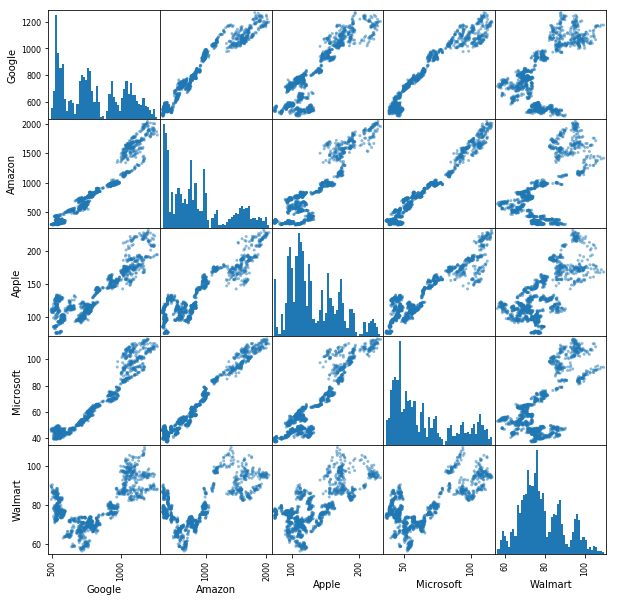

In [24]:
scatter_matrix(all_company, alpha = 0.5, figsize = (10,10), hist_kwds ={"bins":50})
plt.show()

Candlestick 



In [25]:
from mpl_finance import candlestick_ochl
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY
from datetime import datetime



In [26]:
# Get new dataframe for Jan 2019
google_jan_2019 = google.iloc[-30:-1]
# date2num(datetime.strptime(google_jan_2019.index[1], "%Y/%m/%d"))
date_for_convert = [datetime.strptime(each,"%Y/%m/%d") for each in google_jan_2019.index]
google_jan_2019["date_axes"] = [date2num(each) for each in date_for_convert]
gg_jan_values = [tuple(vals) for vals in google_jan_2019[['date_axes','open','close','high','low']].values]


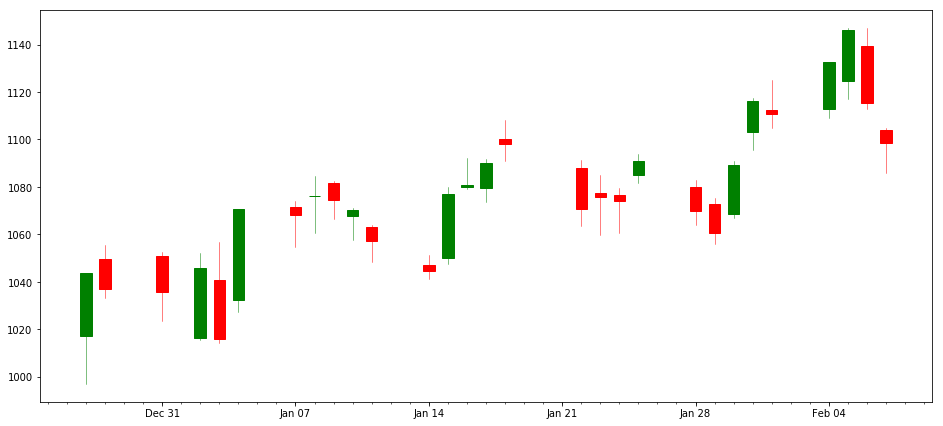

In [27]:

mondays = WeekdayLocator(MONDAY)
alldays = DayLocator()
weekFormatter = DateFormatter('%b %d')
dayFormatter = DateFormatter("%d")

fig, ax = plt.subplots(figsize=(16,8))
fig.subplots_adjust(bottom = 0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

candlestick_ochl(ax, gg_jan_values, width=0.6, colorup='g', colordown='r')
plt.show()

# Portfoilio 

##  Daily Returns 

rt= (pt/pt-1)-1

$ r_t = \frac{p_t}{p_{t-1}} -1$

In [28]:
google['daily returns']= (google['close']/google['close'].shift(1)) - 1


In [29]:
google.head()

,close,volume,open,high,low,total trade,MA50,MA200,daily returns
date,,,,,,,,,
2014/03/27,558.46,13052.0,568.00,568.00,552.92,7413536.00,NaN,NaN,NaN
2014/03/28,559.99,41003.0,561.20,566.43,558.67,23010883.60,NaN,NaN,0.002740
2014/03/31,556.97,10772.0,566.89,567.00,556.93,6106539.08,NaN,NaN,-0.005393
2014/04/01,567.16,7932.0,558.71,568.45,558.71,4431687.72,NaN,NaN,0.018295
2014/04/02,567.00,146697.0,599.99,604.83,562.19,88016733.03,NaN,NaN,-0.000282


In [30]:
amazon['daily returns'] = (amazon['close']/amazon['close'].shift(1))-1

In [31]:
amazon.head()

,close,volume,open,high,low,total trade,daily returns
date,,,,,,,
2014/02/10,360.87,3447970.0,361.610,365.00,359.35,1.246820e+09,NaN
2014/02/11,361.79,3220432.0,361.842,363.61,356.25,1.165288e+09,0.002549
2014/02/12,349.25,6586835.0,356.430,357.75,346.32,2.347746e+09,-0.034661
2014/02/13,357.20,4174300.0,347.700,357.20,346.50,1.451404e+09,0.022763
2014/02/14,357.35,3522810.0,359.340,359.34,353.35,1.265887e+09,0.000420


In [32]:
apple['daily returns'] = (apple['close']/apple['close'].shift(1))-1

In [33]:
apple.head()

,close,volume,open,high,low,total trade,MA100,MA200,daily returns
date,,,,,,,,,
2014/02/10,75.5700,86342646.0,74.0943,75.9985,74.0000,6.397498e+09,NaN,NaN,NaN
2014/02/11,76.5657,70489461.0,75.8014,76.8214,75.6428,5.343200e+09,NaN,NaN,0.013176
2014/02/12,76.5600,76994423.0,76.7071,77.0800,76.1771,5.906019e+09,NaN,NaN,-0.000074
2014/02/13,77.7757,76790093.0,76.3800,77.8357,76.3143,5.865227e+09,NaN,NaN,0.015879
2014/02/14,77.7128,68395257.0,77.4957,77.9971,77.3157,5.300338e+09,NaN,NaN,-0.000809


In [34]:
walmart['daily returns'] = (walmart['close']/walmart['close'].shift(1))-1

In [35]:
walmart.head()

,close,volume,open,high,low,total trade,MA100,MA365,daily returns
date,,,,,,,,,
2014/02/10,73.76,6204086.0,73.59,73.760,72.96,4.565587e+08,NaN,NaN,NaN
2014/02/11,74.80,6511228.0,73.90,74.850,73.67,4.811797e+08,NaN,NaN,0.014100
2014/02/12,74.96,5339771.0,74.22,75.180,74.22,3.963178e+08,NaN,NaN,0.002139
2014/02/13,75.36,5250165.0,74.68,75.490,74.56,3.920823e+08,NaN,NaN,0.005336
2014/02/14,75.79,4919940.0,75.40,75.985,75.10,3.709635e+08,NaN,NaN,0.005706


In [36]:
microsoft['daily returns'] = (microsoft['close']/microsoft['close'].shift(1))-1

In [37]:
microsoft.head()

,close,volume,open,high,low,total trade,daily returns
date,,,,,,,
2014/02/10,36.800,26735870.0,36.63,36.80,36.29,9.793349e+08,NaN
2014/02/11,37.175,32133250.0,36.88,37.26,36.86,1.185074e+09,0.010190
2014/02/12,37.470,27051620.0,37.35,37.60,37.30,1.010378e+09,0.007935
2014/02/13,37.610,37635520.0,37.33,37.86,37.33,1.404934e+09,0.003736
2014/02/14,37.620,42985490.0,37.39,37.78,37.33,1.607227e+09,0.000266


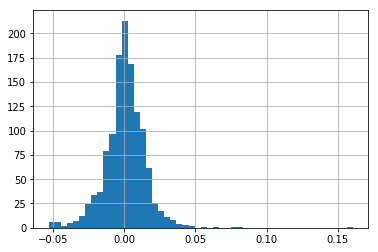

In [38]:
google['daily returns'].hist(bins=50)

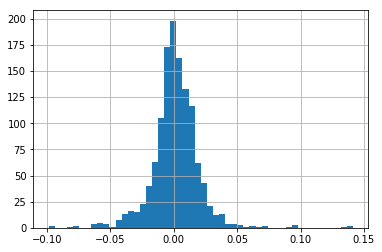

In [39]:
amazon['daily returns'].hist(bins=50)

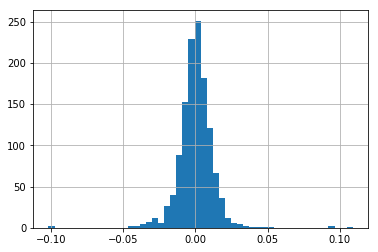

In [40]:
walmart['daily returns'].hist(bins=50)

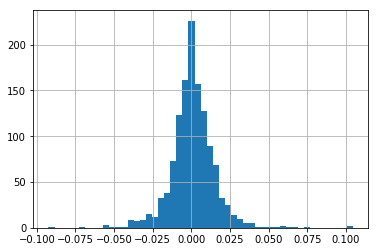

In [41]:
microsoft['daily returns'].hist(bins=50)

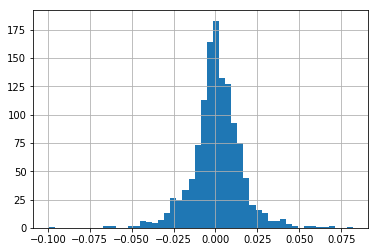

In [42]:
apple['daily returns'].hist(bins=50)

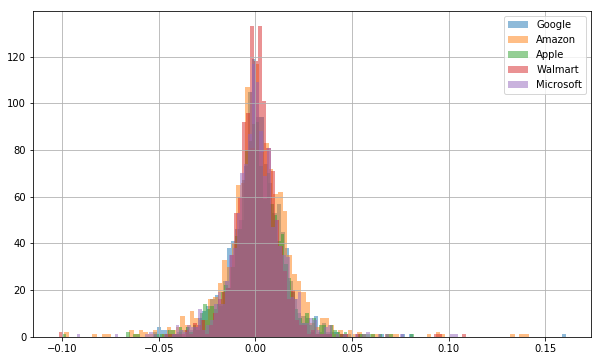

In [43]:
google['daily returns'].hist(bins=100, figsize = (10,6), alpha= 0.5, label= 'Google')
amazon['daily returns'].hist(bins=100, figsize = (10,6), alpha = 0.5,label = 'Amazon')
apple['daily returns'].hist(bins=100, alpha = 0.5,label = 'Apple')
walmart['daily returns'].hist(bins=100, alpha = 0.5,label = 'Walmart')
microsoft['daily returns'].hist(bins=100, alpha = 0.5,label = 'Microsoft')

plt.legend()
plt.show()


# Kernel Dansity Estimate

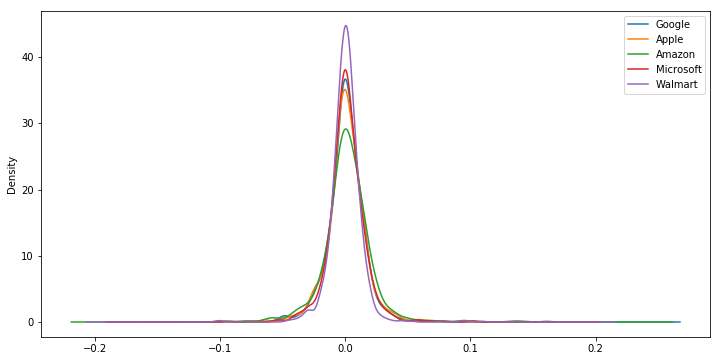

In [44]:
google['daily returns'].plot(kind='kde', label="Google", figsize=(12,6))
apple['daily returns'].plot(kind='kde', label="Apple")
amazon['daily returns'].plot(kind='kde', label="Amazon")
microsoft['daily returns'].plot(kind='kde', label="Microsoft")
walmart['daily returns'].plot(kind='kde', label="Walmart")
plt.legend()

# Box Plots


In [45]:
daily_returns = pd.concat([google['daily returns'], 
                           amazon['daily returns'], 
                           apple['daily returns'],
                           microsoft['daily returns'], 
                           walmart['daily returns']
                          ], axis= 1)
daily_returns.columns = ["Google", "Amazon", "Apple", "Microsoft", "Walmart"]

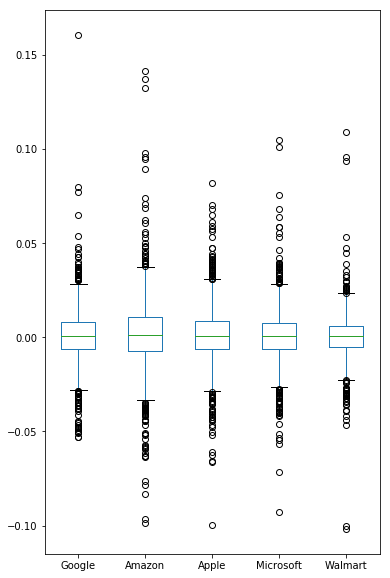

In [46]:
daily_returns.plot(kind="Box", figsize = (6,10))

scatter matrix 

In [75]:
daily_returns = pd.concat([google['daily returns'],
                        amazon ['daily returns'],
                        apple['daily returns'],
                        microsoft['daily returns'],
                        walmart ['daily returns']], axis = 1)
daily_returns.column = ["Google","Amazon", "Apple","Microsoft", "Walmart"]


# Cumulative returns


In [61]:
google['cumulative returns'] = (1+google['daily returns']).cumprod()

In [62]:
google.head()

,close,volume,open,high,low,total trade,MA50,MA200,daily returns,cumulative returns
date,,,,,,,,,,
2014/03/27,558.46,13052.0,568.00,568.00,552.92,7413536.00,NaN,NaN,NaN,NaN
2014/03/28,559.99,41003.0,561.20,566.43,558.67,23010883.60,NaN,NaN,0.002740,1.002740
2014/03/31,556.97,10772.0,566.89,567.00,556.93,6106539.08,NaN,NaN,-0.005393,0.997332
2014/04/01,567.16,7932.0,558.71,568.45,558.71,4431687.72,NaN,NaN,0.018295,1.015579
2014/04/02,567.00,146697.0,599.99,604.83,562.19,88016733.03,NaN,NaN,-0.000282,1.015292


In [66]:
amazon['cumulative returns'] = (1+amazon['daily returns']).cumprod()

In [67]:
amazon.head()

,close,volume,open,high,low,total trade,daily returns,cumulative returns
date,,,,,,,,
2014/02/10,360.87,3447970.0,361.610,365.00,359.35,1.246820e+09,NaN,NaN
2014/02/11,361.79,3220432.0,361.842,363.61,356.25,1.165288e+09,0.002549,1.002549
2014/02/12,349.25,6586835.0,356.430,357.75,346.32,2.347746e+09,-0.034661,0.967800
2014/02/13,357.20,4174300.0,347.700,357.20,346.50,1.451404e+09,0.022763,0.989830
2014/02/14,357.35,3522810.0,359.340,359.34,353.35,1.265887e+09,0.000420,0.990246


In [68]:
walmart['cumulative returns'] = (1+walmart['daily returns']).cumprod()

In [69]:
walmart.head()

,close,volume,open,high,low,total trade,MA100,MA365,daily returns,cumulative returns
date,,,,,,,,,,
2014/02/10,73.76,6204086.0,73.59,73.760,72.96,4.565587e+08,NaN,NaN,NaN,NaN
2014/02/11,74.80,6511228.0,73.90,74.850,73.67,4.811797e+08,NaN,NaN,0.014100,1.014100
2014/02/12,74.96,5339771.0,74.22,75.180,74.22,3.963178e+08,NaN,NaN,0.002139,1.016269
2014/02/13,75.36,5250165.0,74.68,75.490,74.56,3.920823e+08,NaN,NaN,0.005336,1.021692
2014/02/14,75.79,4919940.0,75.40,75.985,75.10,3.709635e+08,NaN,NaN,0.005706,1.027522


In [70]:
microsoft['cumulative returns'] = (1+microsoft['daily returns']).cumprod()

In [71]:
microsoft.head()

,close,volume,open,high,low,total trade,daily returns,cumulative returns
date,,,,,,,,
2014/02/10,36.800,26735870.0,36.63,36.80,36.29,9.793349e+08,NaN,NaN
2014/02/11,37.175,32133250.0,36.88,37.26,36.86,1.185074e+09,0.010190,1.010190
2014/02/12,37.470,27051620.0,37.35,37.60,37.30,1.010378e+09,0.007935,1.018207
2014/02/13,37.610,37635520.0,37.33,37.86,37.33,1.404934e+09,0.003736,1.022011
2014/02/14,37.620,42985490.0,37.39,37.78,37.33,1.607227e+09,0.000266,1.022283


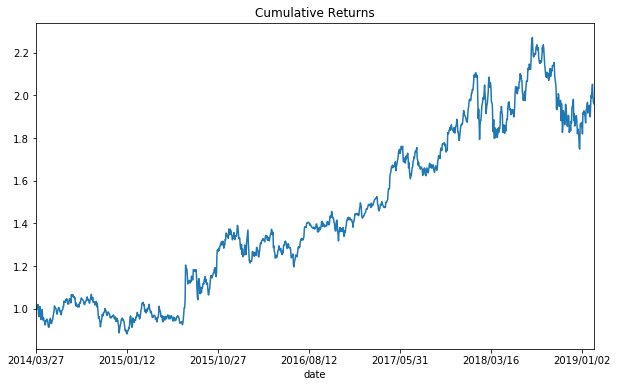

In [77]:

google['cumulative returns'].plot(label= "Google", title = "Cumulative Returns", figsize= (10,6))





Portfolio 

In [78]:
portfolio = pd.concat([google['close'],
                      amazon ['close'],
                      apple['close'],
                       microsoft['close'],
                       walmart['close']], axis = 1)

portfolio.columns = ["Google", "Amazon", "Apple", "Microsoft", "Walmart"]
portfolio.head()

,Google,Amazon,Apple,Microsoft,Walmart
2014/02/10,NaN,360.87,75.5700,36.800,73.76
2014/02/11,NaN,361.79,76.5657,37.175,74.80
2014/02/12,NaN,349.25,76.5600,37.470,74.96
2014/02/13,NaN,357.20,77.7757,37.610,75.36
2014/02/14,NaN,357.35,77.7128,37.620,75.79


In [80]:
portfolio['Google'] = portfolio ['Google'].fillna(value=portfolio['Google'].mean())

In [81]:
portfolio.head()

,Google,Amazon,Apple,Microsoft,Walmart
2014/02/10,804.150863,360.87,75.5700,36.800,73.76
2014/02/11,804.150863,361.79,76.5657,37.175,74.80
2014/02/12,804.150863,349.25,76.5600,37.470,74.96
2014/02/13,804.150863,357.20,77.7757,37.610,75.36
2014/02/14,804.150863,357.35,77.7128,37.620,75.79


In [82]:
avg_daily_return = portfolio.pct_change(1).mean()
avg_daily_return

Google       0.000400
Amazon       0.001366
Apple        0.000765
Microsoft    0.000946
Walmart      0.000281
dtype: float64

In [86]:
portfolio_daily_return = portfolio.pct_change(1)
avg_daily_return = portfolio_daily_return.mean()
avg_daily_return

Google       0.000400
Amazon       0.001366
Apple        0.000765
Microsoft    0.000946
Walmart      0.000281
dtype: float64

In [87]:
# Log return 

log_return = np.log(portfolio/portfolio.shift(1))


In [88]:
log_return.head()

,Google,Amazon,Apple,Microsoft,Walmart
2014/02/10,NaN,NaN,NaN,NaN,NaN
2014/02/11,0.0,0.002546,0.013090,0.010139,0.014001
2014/02/12,0.0,-0.035276,-0.000074,0.007904,0.002137
2014/02/13,0.0,0.022508,0.015754,0.003729,0.005322
2014/02/14,0.0,0.000420,-0.000809,0.000266,0.005690


# 1 single simulation 

In [93]:
log_return = np.log(portfolio/portfolio.shift(1))
log_return.tail()

,Google,Amazon,Apple,Microsoft,Walmart
2019/02/04,0.019657,0.004344,0.028009,0.028392,0.009649
2019/02/05,0.011576,0.015492,0.016965,0.013900,0.008720
2019/02/06,-0.027208,-0.011246,0.000344,-0.011161,0.000418
2019/02/07,-0.014924,-0.015910,-0.019121,-0.007194,0.011332
2019/02/08,-0.003328,-0.016331,-0.003105,0.003793,-0.011960


In [101]:
np.random.seed(101)

# stocks 
print("Stock in portfolio: ")
print(portfolio.columns)
print()


# Generate random weights

weights = np.array(np.random.random(len(portfolio.columns)))
weights = weights/np.sum(weights)

print(weights)

# expected returns 

exp_ret = np.sum(log_return.mean()*weights)*252
print(exp_ret)

Stock in portfolio: 
Index(['Google', 'Amazon', 'Apple', 'Microsoft', 'Walmart'], dtype='object')

[0.26182041 0.28933544 0.01443678 0.08696357 0.3474438 ]
0.14084473024801444


In [102]:
# risk, volatility 

exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_return.cov()*252, weights)))
print(exp_vol)

0.1859445224182018


In [109]:
# Sharpe Ratio 
sr = exp_ret/exp_vol
sr

0.75745565621581

## 15000 Simulations 

In [113]:
num_sim = 15000
all_weights = np.zeros((num_sim, len(portfolio.columns)))
all_ret = np.zeros(num_sim)
all_vol = np.zeros(num_sim)
sharpe = np.zeros(num_sim)

for i in range(num_sim):
    weights = np.array(np.random.random(len(portfolio.columns)))
    weights = weights/np.sum(weights)
    
    all_weights [i, :] = weights
    
    exp_ret = (log_return.mean()*weights)*252
    
    all_ret[i] = np.sum(exp_ret)
    
    all_vol[i] = np.sqrt(np.dot(weights.T, np.dot(log_return.cov()*252, weights)))
    
    sharpe [i] = all_ret[i]/all_vol[i]
    

In [114]:
sharpe.max()

1.0624438809158656

In [116]:
best = sharpe.argmax()

best 

6952

In [117]:
best_ret = all_ret[best]
best_ret

0.23196645617148814

In [118]:
best_vol = all_vol[best]
best_vol

0.21833290241318398

In [120]:
print(all_weights[best, :])
print(portfolio.columns)

[0.00735134 0.42918686 0.09130753 0.40610278 0.06605149]
Index(['Google', 'Amazon', 'Apple', 'Microsoft', 'Walmart'], dtype='object')


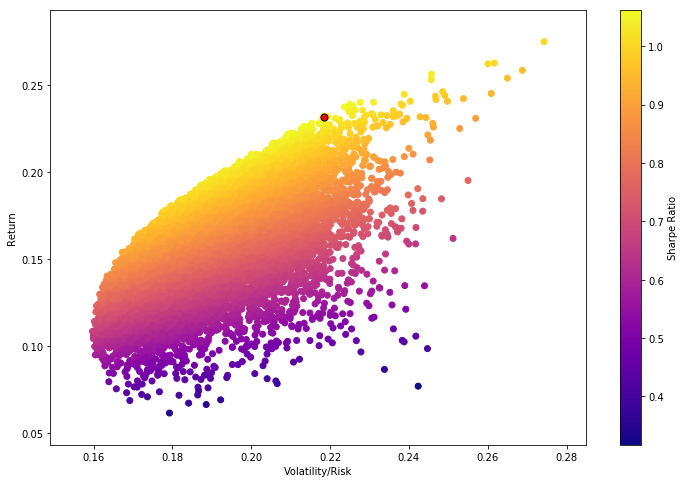

In [122]:
plt.figure(figsize = (12,8))
plt.scatter(all_vol, all_ret, c=sharpe, cmap = 'plasma')
plt.colorbar(label= "Sharpe Ratio")
plt.xlabel("Volatility/Risk")
plt.ylabel("Return")

plt.scatter(best_vol, best_ret, c = 'red', s=50, edgecolors = 'black')